## Perceptron Learning Algorithm

The perceptron is a simple supervised machine learning algorithm and one of the earliest neural network architectures. It was introduced by Rosenblatt in the late 1950s. A perceptron represents a binary linear classifier that maps a set of training examples (of $d$ dimensional input vectors) onto binary output values using a $d-1$ dimensional hyperplane. But Today, we will implement **Multi-Classes Perceptron Learning Algorithm** 
**Given:**
* dataset $\{(x^i, y^i)\}$, $i \in (1, M)$
* $x^i$ is $d$ dimension vector, $x^i = (x^i_1, \dots x^i_d)$
* $y^i$ is multi-class target varible $y^i \in \{0,1,2\}$

A perceptron is trained using gradient descent. The training algorithm has different steps. In the beginning (step 0) the model parameters are initialized. The other steps (see below) are repeated for a specified number of training iterations or until the parameters have converged.

**Step0:** Initial the weight vector and bias with zeros     
**Step1:** Compute the linear combination of the input features and weight. $y^i_{pred} = \arg\max_k W_k*x^i + b$    
**Step2:** Compute the gradients for parameters $W_k$, $b$. **Derive the parameter update equation Here (5 points)**   

##################################     
TODO: Derive you answer hear
#################################

if y_predict==y:

                accuracy+=1
                
            else:
            
                weight_true_vector+=learning_rate*x
                
                weight_predict_vector-=learning_rate*x
                
              bias+=learning_rate*(weight_true_vector-weight_predict_vector) 
              
                        

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

np.random.seed(0)
random.seed(0)

In [2]:
iris = datasets.load_iris()
X = iris.data
print(type(X))
y = iris.target
y = np.array(y)
print('X_Shape:', X.shape)
print('y_Shape:', y.shape)
print('Label Space:', np.unique(y))

<class 'numpy.ndarray'>
X_Shape: (150, 4)
y_Shape: (150,)
Label Space: [0 1 2]


In [3]:
## split the training set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)
print('X_train_Shape:', X_train.shape)
print('X_test_Shape:',  X_test.shape)
print('y_train_Shape:', y_train.shape)
print('y_test_Shape:',  y_train.shape)

print(type(y_train))



X_train_Shape: (105, 4)
X_test_Shape: (45, 4)
y_train_Shape: (105,)
y_test_Shape: (105,)
<class 'numpy.ndarray'>


In [10]:
class MultiClsPLA(object):
    
    ## We recommend to absorb the bias into weight.  W = [w, b]
    
    def __init__(self, X_train, y_train, X_test, y_test, lr, num_epoch, weight_dimension, num_cls):
        super(MultiClsPLA, self).__init__()
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.weight = self.initial_weight(weight_dimension, num_cls)
        self.sample_mean = np.mean(self.X_train, 0)
        self.sample_std = np.std(self.X_train, 0)
        self.num_epoch = num_epoch
        self.lr = lr
        self.total_acc_train = []
        self.total_acc_tst = []
          
    def initial_weight(self, weight_dimension, num_cls):
        weight = np.random.normal(loc=0,scale=0.01,size=(weight_dimension+1,num_cls))
        #########################################
        ##  ToDO: Initialize the weight with   ##
        ##  small std and zero mean gaussian   ##
        #########################################
     
        return weight
        
    def data_preprocessing(self, data):
        #####################################
        ##  ToDO: Normlize the data        ##
        #####################################
        norm_data = (data-self.sample_mean)/self.sample_std
        return norm_data
    
    def train_step(self, X_train, y_train, shuffle_idx):
        np.random.shuffle(shuffle_idx)
        X_train = X_train[shuffle_idx]
        y_train = y_train[shuffle_idx]
        train_acc = 0
        cmp=0
        num_sample = X_test.shape[0]
        ##############################################
        ## TODO: to implement the training process  ##
        ## and update the weights                   ##
        ##############################################

        for num in range(num_sample):

            y_pred=np.dot(X_train[num],self.weight[0:-1])+self.weight[-1]
            predict_result=int(np.argmax(y_pred))
            if predict_result==y_train[num]:
                cmp+=1
            else:
                self.weight[0:-1,y_train[num]]+=self.lr*X_train[num]
                self.weight[0:-1,predict_result]-=self.lr*X_train[num]
                self.weight[:1]+=self.lr*(y_train[num]-predict_result)
            train_acc=cmp/num_sample
            

        return train_acc
        
    def test_step(self, X_test, y_test):
      
        X_test = self.data_preprocessing(data=X_test)
        num_sample = X_test.shape[0]
        test_acc = 0

        #########################################
        ##  ToDO: Evaluate the test set and    ##
        ##  return the test acc                ##
        #########################################
        cmp = 0

        for num in range(num_sample):

            y_pred = np.dot(X_test[num], self.weight[0:-1]) + self.weight[-1]
            predict_result = int(np.argmax(y_pred))
            if predict_result == y_test[num]:
                cmp += 1
            test_acc = cmp / num_sample
        return test_acc
    def train(self):
           
        self.X_train = self.data_preprocessing(data=self.X_train)
        num_sample = self.X_train.shape[0]
        self.X_test = self.data_preprocessing(data=self.X_test)
        ######################################################
        ### TODO: In order to absorb the bias into weights ###
        ###  we need to modify the input data.             ###
        ###  So You need to transform the input data       ###
        ######################################################
         
        
        shuffle_index = np.array(range(0, num_sample))
        for epoch in range(self.num_epoch):
            training_acc = self.train_step(X_train=self.X_train, y_train=self.y_train, shuffle_idx=shuffle_index)
            tst_acc = self.test_step(X_test=self.X_test,  y_test=self.y_test)
            self.total_acc_train.append(training_acc)
            self.total_acc_tst.append(tst_acc)
            print('epoch:', epoch, 'traing_acc:%.3f'%training_acc, 'tst_acc:%.3f'%tst_acc)
    
    def vis_acc_curve(self):
        train_acc = np.array(self.total_acc_train)
        tst_acc = np.array(self.total_acc_tst)
        plt.plot(train_acc)
        plt.plot(tst_acc)
        plt.legend(['train_acc', 'tst_acc'])
        plt.show()

epoch: 0 traing_acc:0.711 tst_acc:0.733
epoch: 1 traing_acc:0.778 tst_acc:0.578
epoch: 2 traing_acc:0.822 tst_acc:0.600
epoch: 3 traing_acc:0.800 tst_acc:0.778
epoch: 4 traing_acc:0.733 tst_acc:0.511
epoch: 5 traing_acc:0.756 tst_acc:0.689
epoch: 6 traing_acc:0.867 tst_acc:0.822
epoch: 7 traing_acc:0.800 tst_acc:0.444
epoch: 8 traing_acc:0.867 tst_acc:0.489
epoch: 9 traing_acc:0.911 tst_acc:0.778
epoch: 10 traing_acc:0.756 tst_acc:0.600
epoch: 11 traing_acc:0.867 tst_acc:0.489
epoch: 12 traing_acc:0.778 tst_acc:0.911
epoch: 13 traing_acc:0.711 tst_acc:0.733
epoch: 14 traing_acc:0.756 tst_acc:0.711
epoch: 15 traing_acc:0.778 tst_acc:0.689
epoch: 16 traing_acc:0.844 tst_acc:0.711
epoch: 17 traing_acc:0.756 tst_acc:0.822
epoch: 18 traing_acc:0.822 tst_acc:0.489
epoch: 19 traing_acc:0.800 tst_acc:0.778
epoch: 20 traing_acc:0.733 tst_acc:0.556
epoch: 21 traing_acc:0.867 tst_acc:0.711
epoch: 22 traing_acc:0.800 tst_acc:0.711
epoch: 23 traing_acc:0.822 tst_acc:0.689
epoch: 24 traing_acc:0.778

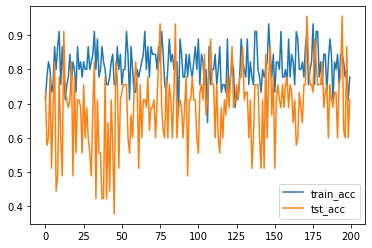

In [17]:
np.random.seed(0)
random.seed(0)
#######################################################
### TODO: 
### 1. You need to import the model and pass some parameters. 
### 2. Then training the model with some epoches.
### 3. Visualize the training acc and test acc verus epoches
net = MultiClsPLA(X_train, y_train, X_test, y_test, lr=0.01, num_epoch=200,
 weight_dimension=4, num_cls=3)
net.train()
print(net.weight)
print(net.weight[:,0])
net.vis_acc_curve()
